# Imports

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

# MNIST Dataset

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

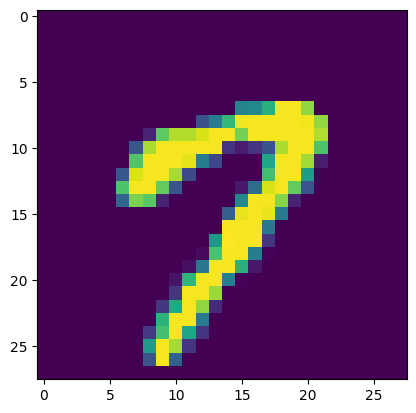

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[15])

# Normalization

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#  Building ANN

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8454 - loss: 0.5205 - val_accuracy: 0.9551 - val_loss: 0.1534
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9628 - loss: 0.1258 - val_accuracy: 0.9612 - val_loss: 0.1248
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9757 - loss: 0.0816 - val_accuracy: 0.9709 - val_loss: 0.0985
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9824 - loss: 0.0580 - val_accuracy: 0.9722 - val_loss: 0.0954
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9864 - loss: 0.0437 - val_accuracy: 0.9665 - val_loss: 0.1157
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9875 - loss: 0.0366 - val_accuracy: 0.9726 - val_loss: 0.1037
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0306 - val_accuracy: 0.9702 - val_loss: 0.1059
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9920 - loss: 0.0242 -

# Evaluation

In [13]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [14]:
y_pred = y_prob.argmax(axis=1)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9769

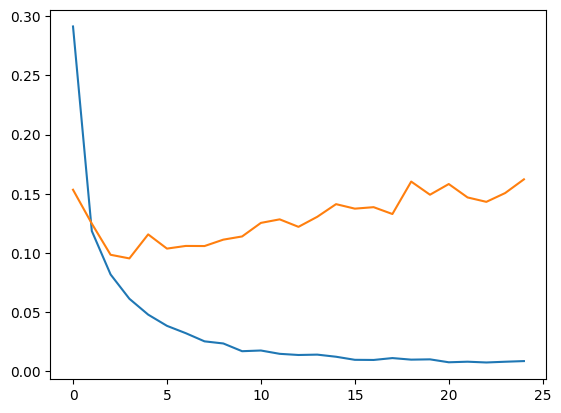

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

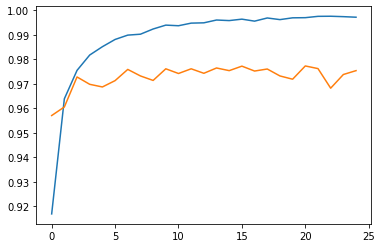

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [18]:
model.save('mnist_model.h5')

# Prediction System

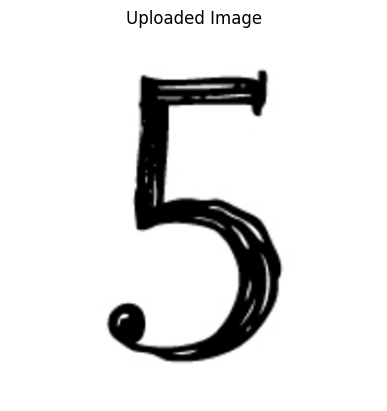

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Class: 6
Class Name: 6
Class Probabilities: [[1.3247091e-29 9.2448829e-17 1.6593927e-01 1.0168973e-18 0.0000000e+00
  8.2919496e-27 8.3397704e-01 8.9093804e-19 8.3683633e-05 0.0000000e+00]]


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image

# Load the trained model
model = load_model("mnist_model.h5")  # Replace with your model file name

# Define prediction function
def predict_and_display_with_class_name(image_path, model):

    # Load the image
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    plt.imshow(image, cmap="gray")  # Display the image
    plt.axis("off")
    plt.title("Uploaded Image")
    plt.show()

    # Preprocess the image
    img_resized = image.resize((28, 28))  # Resize to 28x28 (MNIST input size)
    img_array = img_to_array(img_resized)  # Convert to array
    img_array = img_array / 255.0  # Normalize the pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Map the class index to class name (0-9 for MNIST)
    class_name = str(predicted_class)

    # Display prediction result
    print(f"Predicted Class: {predicted_class}")
    print(f"Class Name: {class_name}")
    print(f"Class Probabilities: {prediction}")

# Example usage
image_path = "/content/b508465fac4f54a40cfdbb2b69707f5a_t.jpeg"  # Replace with the path to your test image
predict_and_display_with_class_name(image_path, model)


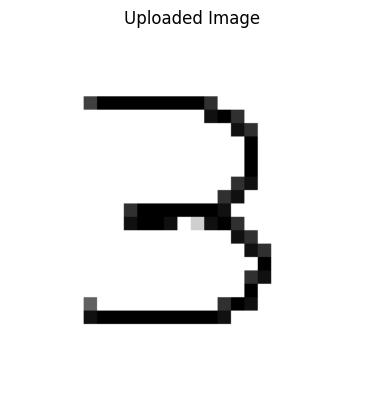

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Class: 6
Class Name: 6
Class Probabilities: [[9.9340384e-30 9.0246989e-25 1.5024798e-13 1.1757978e-27 0.0000000e+00
  2.5084473e-27 1.0000000e+00 2.6963188e-20 6.3466561e-13 0.0000000e+00]]


In [20]:
# Example usage
image_path = "/content/images.png"  # Replace with the path to your test image
predict_and_display_with_class_name(image_path, model)